In [24]:
import pandas as pd
import os
os.chdir('C:/Uconn MSBA/studies/Kaggle/data and code/classification/gender prediction')
import re

In [25]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [26]:
train.head()

,username,gender,status,description
0,Vimal20011,M,"{u'payment_verified': False, u'identity_verifi...",A team of 5 working on various projects relate...
1,sheom,M,"{u'payment_verified': True, u'identity_verifie...",We are an IT solution and service provider com...
2,ezbik,M,"{u'payment_verified': False, u'identity_verifi...",System administration is my work & hobby.
3,angelme,F,"{u'payment_verified': False, u'identity_verifi...",Good day! Thank you for taking some time to ch...
4,snitch1,M,"{u'payment_verified': False, u'identity_verifi...",I build good relation with clients and deliver...


In [27]:
test.head()

,username,status,description
0,nazrulmadina,"{u'payment_verified': False, u'identity_verifi...",I am one of Self-employed person having more t...
1,SehrishWarraich,"{u'payment_verified': False, u'identity_verifi...",i am sehrish warraich.I do my job sincerelly a...
2,samadhinie,"{u'payment_verified': False, u'identity_verifi...","Since 2006, Web based solution provider (Web e..."
3,ebottabi,"{u'payment_verified': False, u'identity_verifi...",Founder of a geolocation service developed on...
4,mrjimoy,"{u'payment_verified': False, u'identity_verifi...","Me? I am Jimmy, meaning honest, courageous, or..."


## 1. Predicting Gender with Username


In [28]:
import nltk
import numpy as np
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import re



# 1.1 Creating the new features

In [29]:
def extract_features(name):
    name_lower = name.lower()
    for c in name_lower:
        if c.isdigit()==True:
            name_lower=name_lower.replace(c,'')
    features={
        'last':name_lower[-1],
        'last_two':name_lower[-2:],
        'last_three':name_lower[-3:],
        'first':name_lower[0],
        'first2':name_lower[:1],
        'first3':name_lower[:2],
        'Capitalornot':bool(re.search('[A-Z]', name)),
        'countofvowel' : len(re.findall('[aeiou]+', name_lower)),
         
    }
    return features

In [33]:
# Extracting features of the user name
trainFeatures=[(extract_features(userName),gender) for 
               userName,gender in zip(train.username,train.gender)]



# decision tree classifier

In [20]:
# Decision Tree Classifier 
from sklearn.model_selection import KFold
import numpy as np
k_fold = KFold(n_splits=5, shuffle=True)
accu = []
for train_idx, test_idx in k_fold.split(feature_sets):
    training = [feature_sets[i] for i in train_idx]
    testing = [feature_sets[i] for i in test_idx]
    classifier_dt = nltk.classify.DecisionTreeClassifier.train(feature_sets, entropy_cutoff=0,support_cutoff=0)   
    accu.append( nltk.classify.util.accuracy(classifier_dt, testing) )
    print('accuracy:', accu[len(accu)-1])    
print('CV mean accuracy:', np.mean(accu))  

accuracy: 0.9968
accuracy: 0.9976
accuracy: 0.9952
accuracy: 0.9928
accuracy: 0.9959967974379503
CV mean accuracy: 0.9956793594875901


In [15]:
# Predicting the gender suinf model
name = ([extract_features(n) for n in username])
pred_gender_train = [classifier_dt.classify(n) for n in name]

# Logistic Regression 

In [34]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from nltk.classify import SklearnClassifier
k_fold = KFold(n_splits=5, shuffle=True)
accu = []
for train_idx, test_idx in k_fold.split(trainFeatures):
    trainSet = [trainFeatures[i] for i in train_idx]
    testSet = [trainFeatures[i] for i in test_idx]
    classifier = SklearnClassifier(LogisticRegression(C=10, random_state=1), sparse=True).train(trainSet)       
    accu.append( nltk.classify.util.accuracy(classifier, testSet) )
    print('accuracy:', accu[len(accu)-1])    
print('CV mean accuracy:', np.mean(accu))

accuracy: 0.8088
accuracy: 0.792
accuracy: 0.7968
accuracy: 0.7904
accuracy: 0.7846277021617294
CV mean accuracy: 0.7945255404323458


# Naiva bayes Classifier

In [36]:
# Naive bayes classifier
k_fold = KFold(n_splits=5, shuffle=True)
accu = []
for train_idx, test_idx in k_fold.split(trainFeatures):
    trainSet = [trainFeatures[i] for i in train_idx]
    testSet = [trainFeatures[i] for i in test_idx]
    classifier = nltk.NaiveBayesClassifier.train(trainSet)   
    accu.append( nltk.classify.util.accuracy(classifier,testSet) )
    print('accuracy:', accu[len(accu)-1])    
print('CV mean accuracy:', np.mean(accu))

accuracy: 0.7624
accuracy: 0.7376
accuracy: 0.7624
accuracy: 0.7432
accuracy: 0.7461969575660529
CV mean accuracy: 0.7503593915132105


In [37]:
# Most informative features
print (classifier_nb.show_most_informative_features(20))

Most Informative Features
                last_two = 'va'                F : M      =     12.1 : 1.0
                  first3 = 'jw'                F : M      =     11.1 : 1.0
                  first3 = 'my'                F : M      =      6.9 : 1.0
              last_three = 'ita'               F : M      =      6.6 : 1.0
                  first3 = 'ee'                F : M      =      6.2 : 1.0
                  first3 = 'jg'                F : M      =      6.2 : 1.0
                  first3 = 'tw'                F : M      =      6.2 : 1.0
                  first3 = 'oa'                F : M      =      6.2 : 1.0
                  first3 = 'pd'                F : M      =      6.2 : 1.0
                  first3 = 'cb'                F : M      =      6.2 : 1.0
                  first3 = 'rl'                F : M      =      6.2 : 1.0
                last_two = 'oi'                F : M      =      6.1 : 1.0
                last_two = 'gy'                F : M      =      6.1 : 1.0

# Classifiers from scikit learn

In [70]:
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
k_fold = KFold(n_splits=5, shuffle=True)
accu = []
for train_idx, test_idx in k_fold.split(featuresets):
    training = [featuresets[i] for i in train_idx]
    testing = [featuresets[i] for i in test_idx]
    classifier_sk = SklearnClassifier(SVC(kernel='linear', C=10, random_state=1), sparse=True).train(training)       
    accu.append( nltk.classify.util.accuracy(classifier_sk, testing) )
    print('accuracy:', accu[len(accu)-1])    
print('CV mean accuracy:', np.mean(accu)) 

accuracy: 0.7344
accuracy: 0.7688
accuracy: 0.7544
accuracy: 0.7352
accuracy: 0.7598078462770216
CV mean accuracy: 0.750521569255


# Decision Tree

In [38]:
# Decision tree
k_fold = KFold(n_splits=5, shuffle=True)
accu = []
for train_idx, test_idx in k_fold.split(trainFeatures):
    trainSet = [trainFeatures[i] for i in train_idx]
    testSet = [trainFeatures[i] for i in test_idx]
    classifier = nltk.DecisionTreeClassifier.train(trainSet)   
    accu.append( nltk.classify.util.accuracy(classifier,testSet) )
    print('accuracy:', accu[len(accu)-1])    
print('CV mean accuracy:', np.mean(accu))

accuracy: 0.7568
accuracy: 0.7608
accuracy: 0.7872
accuracy: 0.7848
accuracy: 0.7694155324259407
CV mean accuracy: 0.7718031064851882


In [40]:
# Predicting gender of the test set based on decisionn tree classifier
predictionsTest=[]
for name in test.username:
    predUserName=classifier.classify(extract_features(name))
    predictionsTest.append(predUserName)

# Maximum Entropy Classifier

In [71]:
#Maximum Entropy Classifier
k_fold = KFold(n_splits=5,shuffle =True)
accu=[]
Xy=list(zip(featuresets,train['gender']))
for train_idx, test_idx in k_fold.split(featuresets):
    training = [featuresets[i] for i in train_idx]
    testing = [featuresets[i] for i in test_idx]
    classifier_maxentr = nltk.classify.MaxentClassifier.train(training, trace=3, max_iter=20)       
    accu.append( nltk.classify.util.accuracy(classifier_maxentr, testing) )
    print('accuracy:', accu[len(accu)-1])    
print('CV mean accuracy:', np.mean(accu)) 

  ==> Training (20 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.813
             2          -0.34059        0.813
             3          -0.31516        0.818
             4          -0.29484        0.836
             5          -0.27841        0.852
             6          -0.26481        0.866
             7          -0.25330        0.876
             8          -0.24339        0.887
             9          -0.23475        0.894
            10          -0.22712        0.900
            11          -0.22033        0.903
            12          -0.21425        0.908
            13          -0.20875        0.913
            14          -0.20376        0.917
            15          -0.19921        0.919
            16          -0.19504        0.922
            17          -0.19120        0.923
            18          -0.18765        0.926
            19          -0.18437        0.927
  

In [ ]:
classifier.show_most_informative_features(10)

## 2. Predicting Gender with Description
The updated notebook for lecture 11 might be of some help, which now includes demo code for making predictions with NLTK classifier.

# preprocessig of the data

In [8]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
ps = PorterStemmer()
from nltk.tokenize import word_tokenize
def preprocess(text):
    return [ps.stem(w) for w in word_tokenize(text.lower()) 
             if w not in string.punctuation and w not in stopwords.words('english')] 

In [9]:
def extract_features(words, selected_words):
    ''' simply using words counts'''
    return nltk.FreqDist([w for w in words if w in selected_words])

In [10]:
data_list=list(zip(train['gender'],train['description'])) 

In [11]:
#appending all the description in a list called description with their gender together

for i in range(len(data_list)):
    if(i==0):
        description = [(preprocess(data_list[i][1]), data_list[i][0])]
    else:
        description = description+[(preprocess(data_list[i][1]), data_list[i][0])]

In [23]:
description[0]

(['team',
  '5',
  'work',
  'variou',
  'project',
  'relat',
  'data',
  'entri',
  'research',
  'work',
  'content',
  'write'],
 'M')

In [24]:
#flatten the words into one list
all_words = [w for words, c in description for w in words]


In [29]:
words_freq = (nltk.FreqDist(all_words))
#words_freq.items()

In [109]:
selected_words = [word for word, freq in words_freq.items() if freq>1]
print('Before:',len(words_freq), ', after:', len(selected_words))

Before: 36128 , after: 9953


In [ ]:
description = [([w for w in words if w in selected_words], c) for words, c in description]


In [111]:
feat = [(extract_features(words,selected_words), c) for words, c in description]

In [26]:
print('Before:',len(words_freq), ', after:',len(selected_words))


Before: 36128 , after: 9953


# Naive Bayes Classifier

In [ ]:
# 2. Cross-Valiation
from sklearn.model_selection import KFold
import numpy as np
k_fold = KFold(n_splits=5, shuffle=True)
accu = []
for train_idx, test_idx in k_fold.split(feat):
    training = [feat[i] for i in train_idx]
    testing = [feat[i] for i in test_idx]
    classifier2_nb = nltk.NaiveBayesClassifier.train(training)   
    accu.append( nltk.classify.util.accuracy(classifier2_nb, testing) )
    print('accuracy:', accu[len(accu)-1])    
print('CV mean accuracy:', np.mean(accu))    

# Maximum Entropy Classifier

In [ ]:
k_fold = KFold(n_splits=5, shuffle=True)
accu = []
for train_idx, test_idx in k_fold.split(feat):
    train = [feat[i] for i in train_idx]
    test = [feat[i] for i in test_idx]
    classifier2_me = nltk.classify.MaxentClassifier.train(train, trace=3, max_iter=5)       
    accu.append( nltk.classify.util.accuracy(classifier2_me, test) )
    print('accuracy:', accu[len(accu)-1])    
print('CV mean accuracy:', np.mean(accu)) 

  ==> Training (5 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.812
             2          -0.38878        0.801
             3          -0.34664        0.786
             4          -0.33367        0.766
         Final          -0.32691        0.760
accuracy: 0.7568
  ==> Training (5 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.813
             2          -0.33899        0.808
             3          -0.29428        0.803
             4          -0.27898        0.797
         Final          -0.27112        0.792
accuracy: 0.7904
  ==> Training (5 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.813
             2          -0.37328        0.803
             3          -0.32308        0.793

# scikit learn

In [98]:
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
k_fold = KFold(n_splits=5, shuffle=True)
accu = []
for train_idx, test_idx in k_fold.split(feat):
    train = [feat[i] for i in train_idx]
    test = [feat[i] for i in test_idx]
    classifier2_sk = SklearnClassifier(SVC(kernel='linear', C=10, random_state=1), sparse=True).train(train)       
    accu.append( nltk.classify.util.accuracy(classifier2_sk, test) )
    print('accuracy:', accu[len(accu)-1])    
print('CV mean accuracy:', np.mean(accu)) 

accuracy: 0.8008
accuracy: 0.804
accuracy: 0.812
accuracy: 0.8304
accuracy: 0.8134507606084868
CV mean accuracy: 0.812130152122


In [ ]:
clf_desc =nltk.classify.MaxentClassifier.train(zip_X_y,trace=3,max_iter=30)
pred_desc = [clf_desc.classify(row) for row in feat_desc_test]

# Checking the accuracu with the test 

In [88]:
#Converting the Test data to processed format
test_list=list(zip(test['gender'],test['description'])) 



In [89]:
#
test_desc=[]
for i in range(len(test_list)):
    if(i==1):
        test_desc = [(preprocess(test_list[i][1]), test_list[i][0])]
    else:
        test_desc = test_desc+[(preprocess(test_list[i][1]), test_list[i][0])]

In [90]:
#
#flatten the words into one list
test_words = [w for words, c in test_desc for w in words]
#
test_freq = nltk.FreqDist(test_words)
#
selected_twords = [word for word, freq in test_freq.items() if freq>1]
print('Before:',len(test_freq), ', after:', len(selected_twords))
#
test_desc = [([w for w in words if w in selected_twords], c) for words, c in test_desc]
#
tfeat = [(extract_features(words,selected_twords), c) for words, c in test_desc]

Before: 20142 , after: 5820


## 3. Predicting Gender with Username, Description, and Status


In [283]:
entire_data=pd.concat([train,test],axis=0)

In [284]:
entire_data.shape

(8928, 4)

In [285]:
test.shape

(2679, 3)

In [286]:
train.shape

(6249, 4)

In [289]:
# Now you need to find a way to split the dictionary format status as multiple columns

##run only once
entire_data["status"] = entire_data["status"].apply(lambda x : dict(eval(x)))

df3 = entire_data["status"].apply(pd.Series)

In [290]:
#train['username']=train['username'].str.extract(r'.*?([A-Za-z]+).*?', expand=True)

#named ending with a,e,i are likely to be females
username_data=pd.DataFrame()
username_data['last_name_ends_with_a_e_i']=entire_data['username'].apply(lambda x:"True" if x.endswith('a') else "True" if x.endswith('e') else "True" if x.endswith('i') else "False")

#names ending in k, o, r, s and t are likely to be male
username_data['last_name_ends_with_k_o_r_s_t']=entire_data['username'].apply(lambda x:"True" if x.endswith('a') else "True" if x.endswith('e') else "True" if x.endswith('i') else "False")

In [291]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk


cv2 = CountVectorizer(tokenizer=nltk.word_tokenize,stop_words='english')
cv_fit2=cv2.fit_transform(entire_data['description']).toarray()
description=pd.DataFrame(cv_fit2,columns=cv2.get_feature_names()) 

list_val=[description.columns]
list_val=list(list_val[0])
list_val=[d for d in list_val if len(d)>2]
description=description[list_val]

description.shape

(8928, 54211)

In [292]:
description=description.drop(description.columns[description.apply(lambda col: (col==0).astype(int).sum(axis=0) > 0.90*len(description))], axis=1)

description.shape

len(df3),len(description),len(entire_data['username'])

df3.reset_index(inplace=True)
df3.drop('index',axis=1,inplace=True)

username_data.reset_index(inplace=True)

len(entire_data),len(username_data),len(df3),len(description)

len(entire_data)

8928

In [293]:
entire_data=entire_data.reset_index()

data=pd.concat([df3,description,username_data['last_name_ends_with_a_e_i'],username_data['last_name_ends_with_k_o_r_s_t']], axis=1)
data=pd.concat([entire_data['username'],data],axis=1)

In [294]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['deposit_made','email_verified','facebook_connected','identity_verified','payment_verified','phone_verified','profile_complete','last_name_ends_with_a_e_i','last_name_ends_with_k_o_r_s_t']
for col in cat_vars:
    data[col]=labelEnc.fit_transform(data[col])
#     filtered_test[col]=labelEnc.fit_transform(filtered_test[col])
    

In [295]:
entire_data['gender']=entire_data['gender'].apply(lambda x:1 if x=="M" else 0)

data.info()

data1=data['username'][len(train):]

data.drop('username',axis=1,inplace=True)

train_cleaned=data[:len(train)]
test_cleaned=data[len(train):]

X=train_cleaned
Y=entire_data['gender'][:len(train)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 28 columns):
username                         8928 non-null object
deposit_made                     8928 non-null int64
email_verified                   8928 non-null int64
facebook_connected               8928 non-null int64
identity_verified                8928 non-null int64
payment_verified                 8928 non-null int64
phone_verified                   8928 non-null int64
profile_complete                 8928 non-null int64
business                         8928 non-null int64
data                             8928 non-null int64
design                           8928 non-null int64
development                      8928 non-null int64
experience                       8928 non-null int64
php                              8928 non-null int64
professional                     8928 non-null int64
project                          8928 non-null int64
projects                         8928 non-nu

In [296]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.30)

Y_train.unique()

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict_proba(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.049999999999997

In [297]:
data1=pd.DataFrame(data1).reset_index()

data1.drop('index',axis=1,inplace=True)

test_Survived = pd.Series(logreg.predict_proba(test_cleaned)[:,1], name="prediction")



#Y_test=Y_test.apply(lambda x:'M' if x==1 else 'F')

test_Survived=test_Survived.apply(lambda x: 'M' if x>0.5 else "F")
# data1[len(X)]
results = pd.concat([data1,test_Survived],axis=1)

results.to_csv('prg16105_2.csv')

# Running different models for it

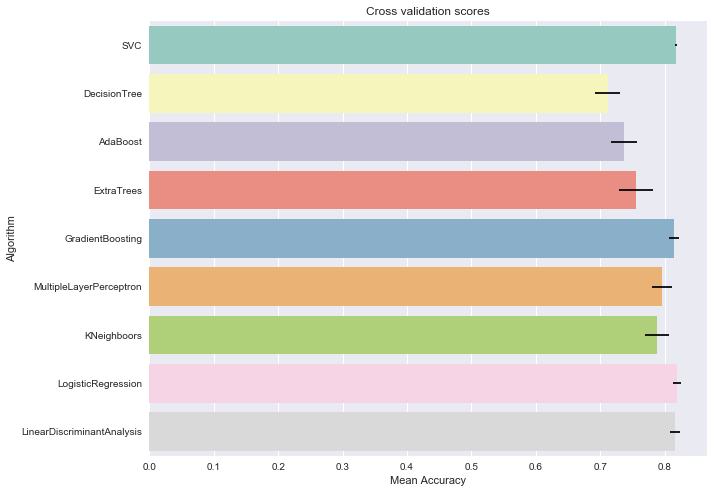

In [298]:

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
#classifiers.append(LGBMClassifier(random_state=random_state))
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_test, y = Y_test, scoring = "accuracy", cv = 10, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

plt.figure(figsize=(10,8))
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
plt.show()

In [299]:
# From the above graph we can see that GBC , SVC is performing best in this 

In [300]:
GBC = GradientBoostingClassifier()
gb_param_grid = {
              'n_estimators' : [40,60,100],
              'learning_rate': [0.1,0.005,0.2],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_
#RFC_best = gsRFC.best_estimator_




Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.5s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:   23.3s finished


# checking the prediction from the best model

In [301]:

test_Survived = pd.Series(GBC_best.predict_proba(test_cleaned)[:,1], name="prediction")



#Y_test=Y_test.apply(lambda x:'M' if x==1 else 'F')

test_Survived=test_Survived.apply(lambda x: 'M' if x>0.5 else "F")
# data1[len(X)]
results = pd.concat([data1,test_Survived],axis=1)

results.to_csv('prg16105_3.csv')

In [302]:
#Checking the accuracy with the best model

In [303]:
GBC_best.score(X_test,Y_test)

0.81759999999999999